# Valuación de empresas mediante método WACC

## WACC, con acciones comunes

\begin{equation}
WACC = \left(\frac{E}{V} \times K_e\right) + \left(\frac{D}{V} \times K_d\right) \times (1-T)
\end{equation}

\begin{equation}
K_e = R_f + \beta \times (R_m - R_f)
\end{equation}

Donde:

* R_f es la tasa libre de riesgo, es decir, el rendimiento que se puede obtener invirtiendo en un activo libre de riesgo, como los bonos del gobierno.
* \beta es el coeficiente beta, que mide la sensibilidad del rendimiento de una acción a los cambios en el mercado en general. Se puede calcular utilizando herramientas financieras como el modelo CAPM (Capital Asset Pricing Model).
* R_m es el rendimiento promedio del mercado de valores en general, que se puede medir utilizando un índice de mercado amplio como el S&P 500.

Es importante destacar que la fórmula del costo del capital común se basa en la teoría financiera moderna y supone que los inversores son racionales y diversificados. Además, es importante tener en cuenta que el costo del capital común suele ser más alto que el costo de la deuda y el costo de la participación preferente, ya que las acciones comunes son más riesgosas y no tienen un pago de dividendos garantizado como las otras dos fuentes de financiación.

\begin{equation}
K_d = \frac{I}{V_d}
\end{equation}

Donde:

* I es el costo anual de la deuda, que incluye el interés pagado sobre los préstamos y cualquier otro costo relacionado con la emisión de deuda.
* V_d es el valor total de la deuda de la empresa.

Cabe destacar que el costo de la deuda es el costo más bajo de las tres fuentes principales de financiamiento, ya que la deuda se considera menos riesgosa que las acciones y las acciones preferentes, debido a que los intereses sobre la deuda deben pagarse antes de que se distribuyan los dividendos a los accionistas.

In [1]:
from finanzas import *

wacc_normal = WACC(
    acciones_comun_precio=40,
    acciones_comun_cantidad=2,
    bonos_total_nominal_override=[10, 20, 15],
    bonos_total_mercado_override=[12, 25, 13],
    bonos_rentabilidad_vencimiento=[0.061, 0.07, 0.1],
    prima_mercado=0.1,
    tasa_impuestos=0.3,
    tasa_libre_riesgo=0.06,
    beta=0.9
)
wacc_normal.estructura_financiera()
wacc_normal.presentacion()

------------------------Estructura financiera-------------------------
Valor de mercado de las acciones comunes (E) (61.54%): 80
Valor de la deuda total (D) (38.46%): 50
Valor de mercado de la empresa (V): 130
------------------------------Resultados------------------------------
Costo del patrimonio (K_e): 15.00%
Costo de la deuda (K_d): 7.56%
Escudo fiscal: 70.00%
Valor WACC: 11.27%


## WACC, con acciones preferentes

\begin{equation}
WACC = \left(\frac{E}{V} \times K_e\right) + \left(\frac{P}{V} \times K_p\right) + \left(\frac{D}{V} \times K_d\right) \times (1-T)
\end{equation}

\begin{equation}
K_p = \frac{D_p}{P_p}
\end{equation}

Donde:

* D_p es el dividendo anual pagado por la empresa a los accionistas preferentes y
* P_p es el precio de la acción preferente.

Cabe destacar que, en general, el costo de la participación preferente suele ser mayor que el costo de la deuda pero menor que el costo del capital común. Esto se debe a que las acciones preferentes tienen preferencia sobre las acciones comunes en términos de pagos de dividendos, lo que las hace menos riesgosas que las acciones comunes, pero a la vez no tienen derecho a voto y, por tanto, no participan en la toma de decisiones empresariales.

In [2]:
from finanzas import *

wacc_acciones_preferentes = WACC(
    acciones_comun_precio=15,
    acciones_comun_cantidad=2_000_000,
    acciones_preferente_precio=80,
    acciones_preferente_cantidad=100_000,
    acciones_dividendo=7,
    bonos_cantidad=[30_000],
    bonos_precio_nominal=[1_000],
    bonos_precio_mercado=[900],
    bonos_tir=Bono(
                tasa_cupon=0.1,
                valor_nominal=1_000,
                valor_mercado=900,
                periodos=10).tir(),
    prima_mercado=0.09,
    tasa_impuestos=0.3,
    tasa_libre_riesgo=0.05,
    beta=1.1
)
wacc_acciones_preferentes.estructura_financiera()
wacc_acciones_preferentes.presentacion()

------------------------Estructura financiera-------------------------
Valor de mercado de las acciones comunes (E) (46.15%): 30,000,000
Valor de mercado de las acciones preferentes (E) (12.31%): 8,000,000
Valor de la deuda total (D) (41.54%): 27,000,000
Valor de mercado de la empresa (V): 65,000,000
------------------------------Resultados------------------------------
Costo del patrimonio (K_e): 14.90%
Costo de la deuda (K_d): 11.75%
Costo de las acciones preferentes (K_p): 8.75%
Escudo fiscal: 70.00%
Valor WACC: 11.37%


# Flujo de caja libre

La tasa de descuento puede ser el WACC también

In [1]:
from finanzas import *

normal = FlujoCajaLibre(
    utilidad_operativa=       [-63_006, 209_647, 209_647, 209_647, 209_647, 209_647],
    depreciacion_amortizacion=[207_331,	237_331, 267_331, 297_331, 327_331,	357_331],
    capex=                    [1_673_995, 240_000, 240_000, 240_000, 240_000, 240_000],
    cambio_capital_trabajo=   [36_441, 141_413, 0, 0, 0, 0],
    impuesto_renta=           [0, 12_544, 12_544, 12_544, 12_544, 12_544],
    tasa_crecimiento=0.03,
    tasa_descuento=0.157
)

normal.presentacion()

------------------------------Resultados------------------------------
Flujo de caja libre: [0, 53021, 224434, 254434, 284434, 314434]
Valor residual (perpetuidad): 2,550,134.0157480314
Valor Presente del FCL: 688,142.8129468191
Valor Presente del FCL (con el valor residual): 1,751,215.2316035493
-----------------------------VNA del FCL------------------------------
Periodo Pronosticado (5 años) (39.30%): 688,142.8129468191
Perpetuidad (>5 años) (60.70%): 1,063,072.41865673
Total: 1,751,215.2316035493


Loop cambiando las tasas de descuento

In [12]:
tasas = [0.134, 0.145, 0.157, 0.168, 0.179]
for tasa in tasas:
    normal.tasa_descuento = tasa
    print(f'Tasa de descuento: {normal.tasa_descuento * 100:.2f}')
    print(f'VNA: {normal.vna():,}')
    print(f'VNA con perpetuidad: {normal.vna_perpetuidad():,}')
    print()

Tasa de descuento: 13.40
VNA: 735,432.5695511482
VNA con perpetuidad: 2,199,816.8510654923

Tasa de descuento: 14.50
VNA: 712,249.8353780699
VNA con perpetuidad: 1,962,036.7257071515

Tasa de descuento: 15.70
VNA: 688,142.8129468191
VNA con perpetuidad: 1,751,215.2316035493

Tasa de descuento: 16.80
VNA: 667,066.7810499574
VNA con perpetuidad: 1,591,404.3015158372

Tasa de descuento: 17.90
VNA: 646,912.5947239182
VNA con perpetuidad: 1,456,190.3932157666



In [2]:
from finanzas import *

normal = FlujoCajaLibre(
    fcl_override=[10_685, 12_638, 12_910, 12_809, 14_183, 11_774, 11_301, 11_379, 11_517, 11_651],
    tasa_crecimiento=0.0,
    tasa_descuento=0.12
)

normal.presentacion()

------------------------------Resultados------------------------------
Flujo de caja libre: [0, 10685, 12638, 12910, 12809, 14183, 11774, 11301, 11379, 11517, 11651]
Valor residual (perpetuidad): 97,091.66666666667
Valor Presente del FCL: 68,569.68034780616
Valor Presente del FCL (con el valor residual): 96,481.21442160229
-----------------------------VNA del FCL------------------------------
Periodo Pronosticado (10 años) (71.07%): 68,569.68034780616
Perpetuidad (>10 años) (28.93%): 27,911.534073796123
Total: 96,481.21442160229


# Valoración de acciones

$$\frac{Dividendo \cdot (1+G)^t}{R-G}$$

Donde:
* $t$ es el periodo (*1 -> Año presente (por defecto), 2 -> 1er año, 3 -> 2do año*)
* $R$ es la tasa de descuento o el retorno requerido, retorno del accionista.
* $G$ es la tasa de crecimiento del dividendo.

Parámetros opcionales:
* El parámetro lista_tasa_crecimiento se utiliza para hacer los pronósticos.

## Acción común con pronóstico de tasas de crecimiento

Valor de la acción (año 0): 159.00
Pronóstico según las tasas de crecimiento: [79.5, 90.85714285714285, 106.0, 127.2]
Ganancia de capital: -9.54


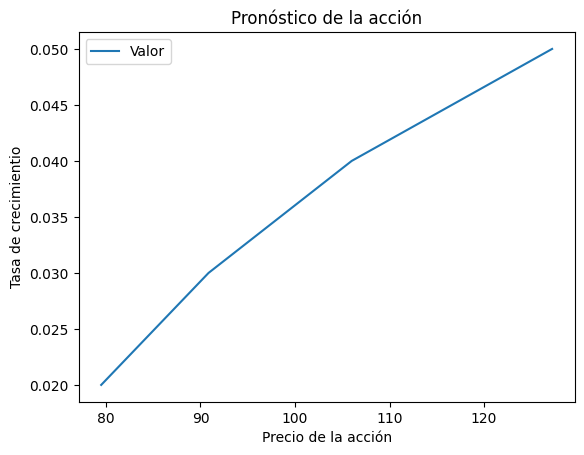

In [1]:
from finanzas import *

accion = AccionComun(
    dividendo_esperado=6,
    periodo=1,
    tasa_descuento=0.1,
    tasa_crecimiento=0.06,
    tasa_crecimiento_lista=[0.02, 0.03, 0.04, 0.05]
)

accion.presentacion()

## Acción común con crecimiento irregular
Se usa el VNA para calcular el precio de la acción presente. Debido a la complejidad de los casos, es mejor diseñar cada procedimiento según el caso.

Supongamos que una empresa de dividendos irregulares anuncia que pagará dividendos de USD2 por acción los dos primeros años, USD3 los dos años siguientes y de ahí los dividendos crecerán 4%; y que el retorno requerido es de r=8%

Flujo: [2, 2, 3, 81.0]
Valor de la acción: 78.00
Valor presente del flujo: 65.49


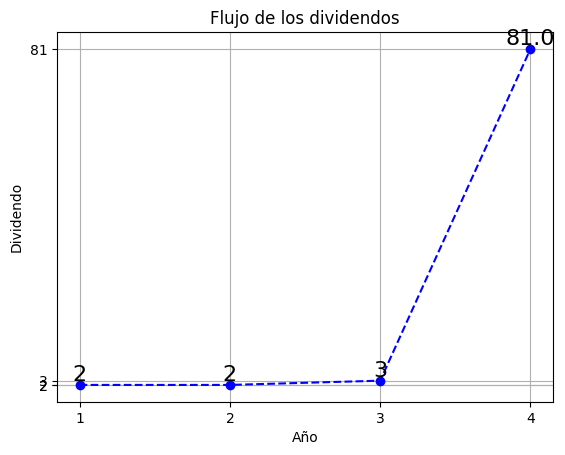

In [1]:
from finanzas import *
import numpy_financial as npf

tasa_descuento = 0.08
accion = AccionComun(
    dividendo_esperado=3,
    periodo=1,
    tasa_descuento=tasa_descuento,
    tasa_crecimiento=0.04,
).valor()

# Flujo
primero = [2, 2]
segundo = [3, 3 + accion]
flujo = primero + segundo

# Consola
print(f'Flujo: {flujo}')
print(f'Valor de la acción: {accion:.2f}')
print(f'Valor presente del flujo: {npf.npv(tasa_descuento, [0] + flujo):.2f}')
AccionComun.grafico_flujo(flujo=flujo)